# Chapter 1: Image-Deconvolution 1


## Problem motivation

<img align="center" src="images/BlurCollage.png"></img>

Real world images we capture are blurry and noisy. 

## Problem formulation
Given a blurry-image ($b$) and a point spread function (PSF) $h$ estimate the clean latent image $i$. Additive noise $n$ is present while measuring the image.    
$$b=i \ast h+n$$


In [30]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import image as image_utils

img = cv2.imread("images/input.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)/255
size = 15

kernel_motion_blur = np.zeros((size,size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur/size

# fliter output 
output = cv2.filter2D(img, -1, kernel_motion_blur)
# Add random noise 
row,col,ch= output.shape
mean = 0
var = 0.001
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
outputNoisy = output + gauss

Text(0.5,1,'Blurry Noisy Output')

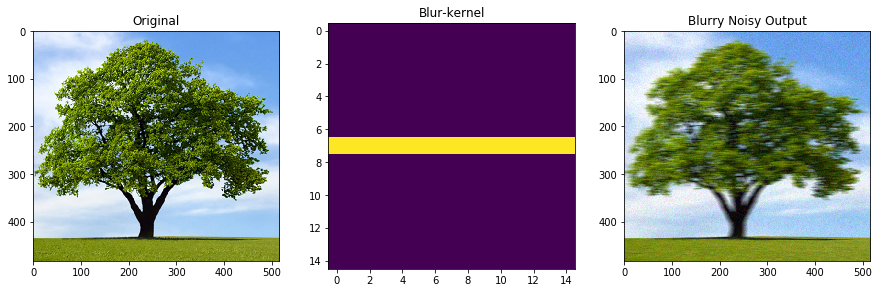

In [31]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(image_utils.convert_float32_to_uint8(img))
plt.title('Original')
plt.subplot(132)
plt.imshow(kernel_motion_blur)
plt.title('Blur-kernel')
plt.subplot(133)
plt.imshow(image_utils.convert_float32_to_uint8(outputNoisy))
plt.title('Blurry Noisy Output')

In [ ]:
## Optimization-based techniques 

-Wiener based deconvolution 
-Richardson-Lucy deconvolution
-Iterative deconvolution techniques


In [ ]:
## Wiener-filter based deconvolution 
- In the absence of noise in the system
<img align="center" src="images/inverseFilter.png" width="250"></img>
Fourier-domain: 
$$B(\omega)=I(\omega)H(\omega)$$
$$\implies I(\omega)=\frac{B(\omega)}{H(\omega)}$$


In [ ]:
## Wiener-filter based deconvolution

This is the simple-inverse filter solution. 

## Wiener-filter based deconvolution

- In the presence of noise in the system
<img align="center" src="images/inverseFilterNoise.png" width="250"></img>
Fourier-domain: 
$$B(\omega)=I(\omega)H(\omega)+N(\omega)$$
$$\implies I(\omega)=\frac{B(\omega)-N(\omega)}{H(\omega)}$$
- Noise can be amplified in the regions where $H(\omega)$ has small values. 

In [ ]:
## Wiener-filter based deconvolution

-The Wiener-filtering: best linear filter applied on $b[k]$ to account for noise characteristics
-Let the filter in the frequency domain be given by $G(\omega)$. 
-Let us assume that we know the autocorrelation of the signal $E[|X(\omega)|^2]=S(\omega)$ 
-The filter is designed to minimize
$$\epsilon(\omega)=E[|\hat{I}(\omega)-I(\omega)|^2]$$
$$=E[|I(\omega)-G(\omega)B(\omega)|^2]$$
$$=E[|I(\omega)-G(\omega)[H(\omega)I(\omega)+N(\omega)]|^2]$$
$$=E[|I(\omega)(1-G(\omega)H(\omega))-G(\omega)N(\omega)|^2]$$
$$=E[[I(\omega)(1-G(\omega)H(\omega))-G(\omega)N(\omega)]^\ast [I(\omega)(1-G(\omega)H(\omega))-G(\omega)N(\omega)]]$$
$$=E[|I(\omega)|^2|1-G(\omega)H(\omega)|^2+|G(\omega)N(\omega)|^2-I(\omega)G^\ast(\omega)N^\ast(\omega)(1-G(\omega)H(\omega))-G^\ast(\omega)N^\ast(\omega)I(\omega)(1-G(\omega)H(\omega))]$$
-The last two terms are 0 because $E[I^\ast(\omega)N(\omega)]=E[I(\omega)N^\ast\omega]=0$. 

## Wiener-filter based deconvolution

$$\epsilon(\omega)=S(\omega)|1-G(\omega)H(\omega)|^2+|G(\omega)N(\omega)|^2$$
$$=S(\omega)[1-G(\omega)H(\omega)][1-G(\omega)H(\omega)]^\ast+[G(\omega)G^\ast(\omega)|N(\omega)|^2]$$
-Taking the Wirtinger derivative of this expression results and equating to zero
$$S(\omega)(1-G(\omega)H(\omega))^\ast [-H(\omega)]+G^\ast(\omega)|N(\omega)|^2=0$$
$$ \implies G^\ast (\omega)=\frac{S(\omega)H(\omega)}{E[|N(\omega)|^2]+|H(\omega)|^2S(\omega)}$$
$$ \implies G (\omega)=\frac{S(\omega)H^\ast(\omega)}{E[|N(\omega)|^2]+|H(\omega)|^2S(\omega)}$$

## Wiener-filter based deconvolution 

-Comparison of inverse filter and Wiener filter solutions

In [ ]:
## Richardson-Lucy deconvolution (RL)

-


In [ ]:
## Iterative deconvolution techniques 


## Deep-learning based techniques 

## Comparison in performance  